In [11]:
import numpy as np

x_train = np.arange(0, 20, 0.1) 
y_train = np.sin(x_train)

x_test = np.arange(20, 30, 0.1) 
y_test = np.sin(x_test)

train_series = y_train.reshape((len(y_train), 1))
test_series  = y_test.reshape((len(y_test), 1))

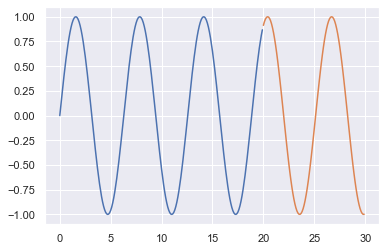

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

plt.plot(x_train, y_train)
plt.plot(x_test, y_test)

In [13]:
from keras.preprocessing.sequence import TimeseriesGenerator

look_back  = 0

train_generator = TimeseriesGenerator(train_series, train_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

test_generator = TimeseriesGenerator(test_series, test_series,
                                      length        = look_back, 
                                      sampling_rate = 1,
                                      stride        = 1,
                                      batch_size    = 10)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential() 
model.add(LSTM(32, input_shape=(look_back, 1)))
#model.add(Dense(32, input_shape=(look_back, 1), activation='relu'))
model.add(Dense(1)) 
model.compile(loss='mse', optimizer='adam')
#model.summary()

In [15]:
hist = model.fit(train_generator, epochs=50)

Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 0.4717
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.2206
Epoch 3/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1510
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1213
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1092
Epoch 6/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0983
Epoch 7/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0853
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0764
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0637
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0521
Epoch 11/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0387
Epoch 12/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0259
Epoch 13/50
19/19 [==============================

In [16]:
y_pred = model.predict(test_generator)

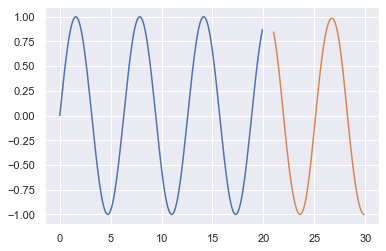

In [21]:
plt.plot(x_train, y_train)
plt.plot(x_test[10:], y_pred)